# Logistic growth and inference

# Parameter inference
## This notebook performs a simulation of logistic growth of bacteria and then inferes the original parameters from the produced data.

The simulation will compute statistical microscopic changes in the assigned time interval and save these changes in a defined number of sample points. The initial parameters include carrying capacity, initial abundance of MOs and reproduction, migration and death rates for each species. The parameters have to be set by hand. The simulation will be repeated several times to generate replications and compute an average over the changes. 

In [26]:
## Packages

import numpy as np
from random import random


## Gillespie algorithm: logistic

def gillespie_logistic():

    # initial condition

    t = 0

    n = np.copy(n0)

    # samples

    timeserie = np.zeros((t_points, n_types), dtype = int)

    # initial state

    timeserie[0, :] = n

    sample_index = 1

    while t <= t_simulated:

        T_up = (gR * n + mR) * (N - n.sum()) / N

        T_down = dR * n / N

        T_up_n_down = np.hstack((T_up, T_down))

        time_par = 1. / T_up_n_down.sum()

        choice_par = T_up_n_down * time_par

        t_sampled = np.random.exponential(time_par)

        q = random()

        p_sum = 0

        i = 0

        while p_sum + choice_par[i] < q:

            p_sum += choice_par[i]

            i += 1

        # sampling

        while sample_index < t_points and sampling_times[sample_index] < t + t_sampled:

            timeserie[sample_index] = n

            sample_index += 1

        # modify current state

        if i < n_types:

            n[i] += 1

        else:

            n[i - n_types] -= 1

        t += t_sampled

    return timeserie



## Parameters

n_types = 4

N = 1E5

# gR = np.array([0.5,0.8,1.4])

# dR = np.array([100,130,160])

# mR = np.array([2000, 4000, 3000])

# n0 = np.array([2800., 1400., 700.])


gR = np.array([0.5,0.8,1.4,1.2])

dR = np.array([100,130,160,100])

mR = np.array([2000, 4000, 3000, 2500])

n0 = np.array([2800., 1400., 700., 1000.])


t_simulated = 5

t_points = 6

sampling_times = np.linspace(0, t_simulated, t_points)

n_timeseries = 4



## Execute Gillespie
data = np.zeros((n_timeseries, t_points, n_types))
for i in range(n_timeseries):
    data[i, :, :] = gillespie_logistic()

# data = gillespie_logistic()
print(data)


[[[ 2800.  1400.   700.  1000.]
  [ 6215.  7608.  7034.  6147.]
  [ 9705. 15069. 18298. 14115.]
  [11820. 20414. 28781. 20929.]
  [12707. 22654. 34123. 24221.]
  [13027. 23456. 36026. 25422.]]

 [[ 2800.  1400.   700.  1000.]
  [ 6339.  7595.  7180.  6243.]
  [ 9863. 14959. 18647. 14521.]
  [11996. 20036. 28832. 21342.]
  [12915. 22389. 34013. 24670.]
  [13242. 23123. 35841. 25813.]]

 [[ 2800.  1400.   700.  1000.]
  [ 6241.  7547.  6984.  6504.]
  [ 9783. 14768. 18439. 15170.]
  [11804. 19902. 28522. 22286.]
  [12668. 22164. 33454. 25689.]
  [12943. 22950. 35276. 26884.]]

 [[ 2800.  1400.   700.  1000.]
  [ 6277.  7539.  7160.  6453.]
  [ 9778. 14730. 18629. 14825.]
  [11902. 19806. 28735. 21911.]
  [12786. 22082. 33779. 25239.]
  [13077. 22915. 35570. 26457.]]]


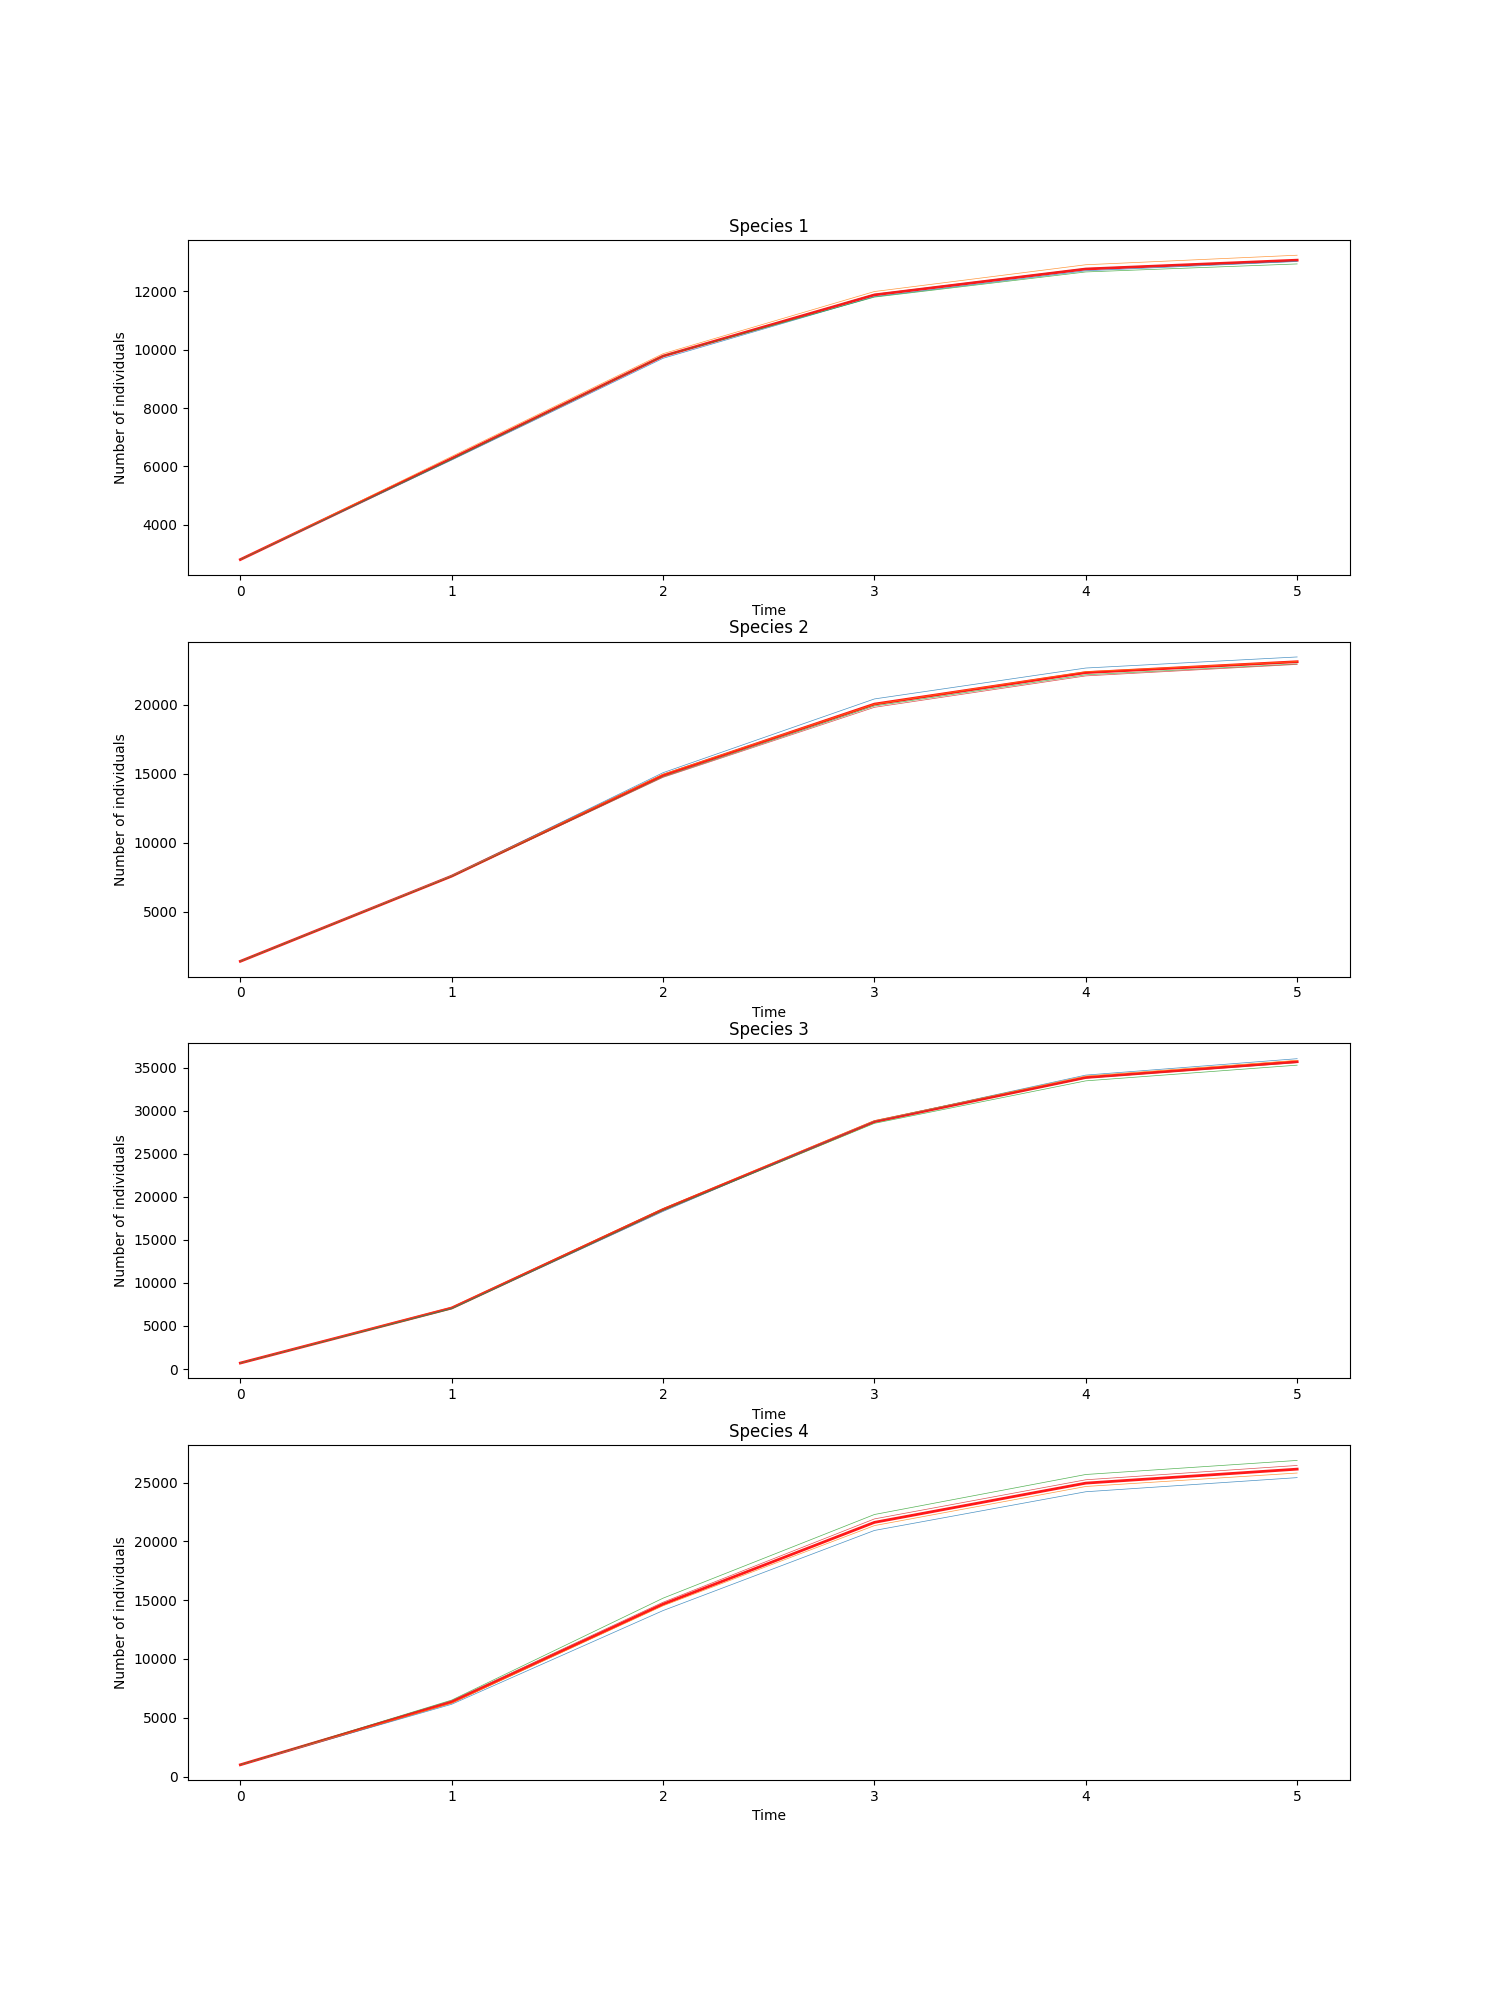

In [40]:
import matplotlib.pyplot as plt

# Calculate average
average_composition = np.zeros((t_points, n_types))

for t in range(t_points):
    for i in range(n_types):
        average_composition[t, i] = data[:, t, i].sum() / n_timeseries


# Plot the results
fig, axs = plt.subplots(n_types, 1, figsize=(15, 20)) #create a figure with subplots for each species
# set axes, data, labels and limits (for average compositions)
for i in range(n_types):
    axs[i].plot(sampling_times, average_composition[:, i], color='red', linewidth=2, alpha=0.9)
    axs[i].set_title('Species ' + str(i+1))
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Number of individuals')
    # axs[i].set_xlim(0, max_time_for_change)
    # axs[i].set_ylim(0, average_composition.max()*3)
# include individual compositions of the replications

#time_for_change[time_for_change == 0] = np.nan
#composition_over_time[composition_over_time == 0] = np.nan

for r in range(n_timeseries):
    for i in range(n_types):
        axs[i].plot(sampling_times, data[r, :, i], linewidth=0.5, alpha=0.8)


# Inference

calculate ODEs with following equations:

$$ \langle n_k \rangle = \frac {\sum_{k}{n_k}} N $$ 

In [28]:
# compute average
average_composition = np.zeros((t_points, n_types))

for t in range(t_points):
    for i in range(n_types):
        average_composition[t, i] = data[:, t, i].sum() / n_timeseries
# print(average_composition)

# composition_change = np.zeros((t_points, n_types))
# composition_change[0, :] = average_composition[0,:]
# for t in range(t_points-1):
#     for i in range(n_types):
#         composition_change[t+1, i] = average_composition[t+1, i] - average_composition[t, i]


# # compute squared average
squared_average_composition = np.zeros((t_points, n_types))
for t in range(t_points):
    for i in range(n_types):
        # print(t,i,(data[:, t, i]**2))
        squared_average_composition[t, i] = np.sum(data[:, t, i]**2) / n_timeseries
# print(squared_average_composition)

# squared_composition_change = np.zeros((t_points, n_types))
# squared_composition_change[0, :] = squared_composition_change[0,:]
# for t in range(t_points-1):
#     for i in range(n_types):
#         squared_composition_change[t+1, i] = squared_average_composition[t+1, i] - squared_average_composition[t, i]


# compute combined average
combined_average_composition = np.zeros((t_points, n_types, n_types))
for t in range(t_points):
    for i in range(n_types):
        for j in range(n_types):
            combined_average_composition[t, i, j] = np.sum(data[:, t, i] * data[:, t, j] ) / n_timeseries
# print(combined_average_composition)

# # calculate change
# combined_composition_change = np.zeros((t_points, n_types, n_types))
# combined_composition_change[0, :, :] = combined_average_composition[0,:,:]
# for t in range(t_points-1):
#     for i in range(n_types):
#         for j in range(n_types):
#             combined_composition_change[t+1, i, j] = combined_average_composition[t+1, i, j] - combined_average_composition[t, i, j]


In [29]:
print(average_composition)

[[ 2800.    1400.     700.    1000.  ]
 [ 6268.    7572.25  7089.5   6336.75]
 [ 9782.25 14881.5  18503.25 14657.75]
 [11880.5  20039.5  28717.5  21617.  ]
 [12769.   22322.25 33842.25 24954.75]
 [13072.25 23111.   35678.25 26144.  ]]


## The function must be of the following form
The independent variable (time) has to be in first position! followed by other parameters.

```
def f(independent variable, initial condition, parameters):
    return "whatever equation to solve"
```



In [30]:
# aproximate parameters with differential equations

# def average_change(t, k, f, N, m, d):
#     return f * (average_composition[t, k] - combined_average_composition[t, k] / N) + m * (1 - np.sum(average_composition[t, :] / N)) - d / N * average_composition[t, k]

# def squared_change(t, k, f, N, m, d):
#     return f * (average_composition[t, k] - combined_average_composition[t, k] / N +2 (squared_average_composition[t, k] - combined_average_composition[t, k] * average_composition[t, k] / N)) + m * (1 - np.sum(average_composition[t, :] / N) + 2 * (average_composition[t, k] - combined_average_composition[t, k] / N)) + d / N * (average_composition[t, k] - 2 * squared_average_composition[t, k])

# def combined_change(t, k, l, f, N, m, d):
#     return 

# for t in range(t_points):
#     for k in range(n_types):
#         while 

In [31]:
from scipy.optimize import curve_fit

#test data
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2
plt.scatter(x_data, y_data)

# fit the model to the data

def func(x, a, b):
    return a*x**2 + b
popt, pcov = curve_fit(func, x_data, y_data, p0=(1,1))
popt

# # Curve fiting the model
# x_data = sampling_times
# for i in range(n_types):
#     y_data = composition_change[:, i]

array([3., 2.])

Set the Bounds and initial values for the parameters in the inference.

In [32]:
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit

# set bounds
N_lower_bound = 60000 
N_upper_bound = 140000
gR_lower_bound = 0
gR_upper_bound = 2
dR_lower_bound = 0
dR_upper_bound = 200
mR_lower_bound = 0
mR_upper_bound = 6000

lower_bound = ((N_lower_bound,) + (gR_lower_bound,) * n_types + (dR_lower_bound,) * n_types + (mR_lower_bound,) * n_types)
upper_bound = ((N_upper_bound,) + (gR_upper_bound,) * n_types + (dR_upper_bound,) * n_types + (mR_upper_bound,) * n_types)
bounds = ((lower_bound), (upper_bound))

# set initial parameters to specify the number of parameters (has to be inside the bounds)
# parameters = np.array((N, 1,1,1, 100,100,100, 3000, 3000, 3000))
parameters = np.ones(1+n_types*3)
parameters[0] = N

The following cell contains the code for infering the parameters for logistic growth from the simulation data. It is adjusted to three different species/types and uses only the first differential equation for the average abundance.

from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit

# def average_change(t, k, X, f, d, m):
def average_change(t, k, X, f1, f2, f3, d1, d2, d3, m1, m2, m3):
    f = np.array([f1, f2, f3])
    d = np.array([d1, d2, d3])
    m = np.array([m1, m2, m3])

    change = np.zeros(n_types)
    for i in range(n_types):
        change[i] = (f[i] * k[i] + m[i]) * (1 - np.sum(k)/ X) - d[i] * k[i]/ X     
    

    return change

def solve(x, X, f1, f2, f3, d1, d2, d3, m1, m2, m3):
    sol = solve_ivp(average_change, t_span=(0, t_simulated), y0=n0, method='LSODA', t_eval=sampling_times, args=(X, f1, f2, f3, d1, d2, d3, m1, m2, m3))
    return sol.y.T.flatten()

# sol =solve(n0, N, 0.5,0.8,1.4, 1E2,1.3E2,1.6E2, 2E3,4E3,3E3)
# print("sol ", sol)

inference_one_equation, pcov = curve_fit(solve, xdata=sampling_times, ydata=average_composition.flatten(), bounds=((60000, 0,0,0, 0,0,0, 0,0,0),(140000, 2, 2, 2, 200, 200, 200, 6000,6000,6000)))
print("popt ", inference_one_equation)
print("popt converted ", ["%7f"%p for p in inference_one_equation])
print("original parameters ", N, gR, dR, mR)

In [33]:
def average_change(t, k, *parameters):
    X, f, d, m = np.split(parameters, [1, n_types+1, 2*n_types+1])

    change = np.zeros(n_types)
    for i in range(n_types):
        change[i] = (f[i] * k[i] + m[i]) * (1 - np.sum(k)/ X) - d[i] * k[i]/ X     
    return change

def solve(x, *parameters):
    sol = solve_ivp(average_change, t_span=(0, t_simulated), y0=n0, method='LSODA', t_eval=sampling_times, args=parameters)
    return sol.y.T.flatten()

# sol =solve(n0, parametersp)
# print("sol ", sol)

inference_one_equation, pcov = curve_fit(solve, xdata=sampling_times, ydata=average_composition.flatten(),p0=parameters, bounds=bounds)
print("popt ", inference_one_equation)
print("popt converted ", ["%7f"%p for p in inference_one_equation])
print("original parameters ", N, gR, dR, mR)

popt  [9.99664854e+04 5.27927366e-01 7.94730790e-01 1.39460275e+00
 1.20348997e+00 2.00000000e+02 6.49284362e+00 1.92517473e+01
 2.62299672e-08 1.81679424e+03 4.00802981e+03 2.99123719e+03
 2.42823710e+03]
popt converted  ['99966.485400', '0.527927', '0.794731', '1.394603', '1.203490', '200.000000', '6.492844', '19.251747', '0.000000', '1816.794237', '4008.029806', '2991.237190', '2428.237101']
original parameters  100000.0 [0.5 0.8 1.4 1.2] [100 130 160 100] [2000 4000 3000 2500]


This cell performs the parameter inference using two of three differential equations.

In [34]:
def average_change(t, k, *parameters):
    X, f, d, m = np.split(parameters, [1, n_types+1, 2*n_types+1])

    # first equation
    change = np.zeros(n_types)
    for i in range(n_types):
        change[i] = (f[i] * k[i] + m[i]) * (1 - np.sum(k[:n_types])/ X) - d[i] * k[i]/ X

    # second equation
    combined_change = np.zeros((n_types, n_types))
    for i in range(n_types):
        for j in range(n_types):
            combined_change[i,j] = k[i] * k[j]
    squared_change_result = np.zeros(n_types)
    for i in range(n_types):
        squared_change_result[i] = f[i] * (k[i] - np.sum(combined_change[i,:]) / X + 2 * (combined_change[i,i] - np.sum(combined_change[i,i] * k[:n_types]) / X)) + m[i] * (1 - np.sum(k[:n_types])/ X + 2 * (k[i] - np.sum(combined_change[i,:]) / X)) + d[i] / X * (k[i] - 2 * combined_change[i,i])

    return np.concatenate((change, squared_change_result))

def solve(x, *parameters):
    sol = solve_ivp(average_change, t_span=(0, t_simulated), y0=np.hstack((n0, squared_average_composition[0,:])), method='LSODA', t_eval=sampling_times, args=parameters)
    return sol.y.T.flatten()


# sol =solve(n0, parametersp)
# print("sol ", sol)

inference_two_equations, pcov = curve_fit(solve, xdata=sampling_times, ydata=np.hstack((average_composition, squared_average_composition)).flatten(), p0=parameters, bounds=bounds)

print("popt ", inference_two_equations)
print("popt converted ", ["%7f"%p for p in inference_two_equations])
print("original parameters ", N, gR, dR, mR)

popt  [9.99121293e+04 5.05420329e-01 7.98537924e-01 1.39696463e+00
 1.20917960e+00 1.35240372e+01 7.65798995e+00 3.22107927e-03
 1.37814973e+01 1.93032062e+03 3.98663024e+03 2.98026615e+03
 2.40480599e+03]
popt converted  ['99912.129280', '0.505420', '0.798538', '1.396965', '1.209180', '13.524037', '7.657990', '0.003221', '13.781497', '1930.320623', '3986.630242', '2980.266147', '2404.805986']
original parameters  100000.0 [0.5 0.8 1.4 1.2] [100 130 160 100] [2000 4000 3000 2500]


# def average_change(t, k, X, f, d, m):
def average_change(t, k, X, f1, f2, f3, d1, d2, d3, m1, m2, m3):
    f = np.array([f1, f2, f3])
    d = np.array([d1, d2, d3])
    m = np.array([m1, m2, m3])

    # first euation
    change = np.zeros(n_types)
    for i in range(n_types):
        change[i] = (f[i] * k[i] + m[i]) * (1 - np.sum(k[:n_types])/ X) - d[i] * k[i]/ X  

    # second equation
    combined_change = np.zeros((n_types, n_types))
    for i in range(n_types):
        for j in range(n_types):
            combined_change[i,j] = k[i] * k[j]
    squared_change_result = np.zeros(n_types)
    for i in range(n_types):
        squared_change_result[i] = f[i] * (k[i] - np.sum(combined_change[i,:]) / X + 2 * (combined_change[i,i] - np.sum(combined_change[i,i] * k[:n_types]) / X)) + m[i] * (1 - np.sum(k[:n_types])/ X + 2 * (k[i] - np.sum(combined_change[i,:]) / X)) + d[i] / X * (k[i] - 2 * combined_change[i,i])
    return np.concatenate((change, squared_change_result))

def solve(x, X, f1, f2, f3, d1, d2, d3, m1, m2, m3):
    sol = solve_ivp(average_change, t_span=(0, t_simulated), y0=np.hstack((n0, squared_average_composition[0,:])), method='LSODA', t_eval=sampling_times, args=(X, f1, f2, f3, d1, d2, d3, m1, m2, m3))
    return sol.y.T.flatten()

# sol =solve(n0, N, 0.5,0.8,1.4, 1E2,1.3E2,1.6E2, 2E3,4E3,3E3)
# print("sol ", sol)

inference_two_equations, pcov = curve_fit(solve, xdata=sampling_times, ydata=np.hstack((average_composition, squared_average_composition)).flatten(), bounds=((60000, 0,0,0, 0,0,0, 0,0,0),(140000, 2, 2, 2, 200, 200, 200, 6000,6000,6000)))
print("popt ", inference_two_equations)
print("popt converted ", ["%7f"%p for p in inference_two_equations])
print("original parameters ", N, gR, dR, mR)

This cell performs the parameter inference using all three differential equations.

In [35]:
def average_change(t, k, *parameters):
    X, f, d, m = np.split(parameters, [1, n_types+1, 2*n_types+1])

    # first equation
    change = np.zeros(n_types)
    for i in range(n_types):
        change[i] = (f[i] * k[i] + m[i]) * (1 - np.sum(k[:n_types])/ X) - d[i] * k[i]/ X

    # second equation
    combined_change = np.zeros((n_types, n_types))
    for i in range(n_types):
        for j in range(n_types):
            combined_change[i,j] = k[i] * k[j]
    squared_change_result = np.zeros(n_types)
    for i in range(n_types):
        squared_change_result[i] = f[i] * (k[i] - np.sum(combined_change[i,:]) / X + 2 * (combined_change[i,i] - np.sum(combined_change[i,i] * k[:n_types]) / X)) + m[i] * (1 - np.sum(k[:n_types])/ X + 2 * (k[i] - np.sum(combined_change[i,:]) / X)) + d[i] / X * (k[i] - 2 * combined_change[i,i])

    # third equation
    combined_change_result = np.zeros((n_types, n_types))
    for i in range(n_types):
        for j in range(n_types):
            combined_change_result[i,j] = (f[i] +f[j]) * (combined_change[i,j] - np.sum(combined_change[i,j] * k[:n_types]) / X) + m[i] * (k[j] - np.sum(combined_change[j,:]) / X) + m[j] * (k[i] - np.sum(combined_change[i,:]) / X) - (d[i] + k[j]) / X * combined_change[i,j]
           
    return np.concatenate((change, squared_change_result, combined_change_result.flatten()))


def solve(x, *parameters):
    sol = solve_ivp(average_change, t_span=(0, t_simulated), y0=H[:2*n_types+n_types**2], method='LSODA', t_eval=sampling_times, args=parameters)
    return sol.y.T.flatten()


H = np.hstack((average_composition, squared_average_composition, np.reshape(combined_average_composition, (t_points, n_types*n_types)))).flatten()


# sol =solve(n0, N, 0.5,0.8,1.4, 1E2,1.3E2,1.6E2, 2E3,4E3,3E3)
# print("sol ", sol)

inference_three_equations, pcov = curve_fit(solve, xdata=sampling_times, ydata=H, p0=parameters, bounds=bounds)

print("popt ", inference_three_equations)
print("popt converted ", ["%7f"%p for p in inference_three_equations])
print("original parameters ", N, gR, dR, mR)

popt  [1.40000000e+05 9.83873316e-02 3.22223410e-01 5.99191277e-01
 4.43031951e-01 4.49038566e-12 2.00000000e+02 2.00000000e+02
 2.00000000e+02 4.08271549e+03 6.00000000e+03 6.00000000e+03
 5.65124785e+03]
popt converted  ['140000.000000', '0.098387', '0.322223', '0.599191', '0.443032', '0.000000', '200.000000', '200.000000', '200.000000', '4082.715494', '6000.000000', '5999.999998', '5651.247846']
original parameters  100000.0 [0.5 0.8 1.4 1.2] [100 130 160 100] [2000 4000 3000 2500]


# def average_change(t, k, X, f, d, m):
def average_change(t, k, X, f1, f2, f3, d1, d2, d3, m1, m2, m3):
    f = np.array([f1, f2, f3])
    d = np.array([d1, d2, d3])
    m = np.array([m1, m2, m3])

    # first euation
    change = np.zeros(n_types)
    for i in range(n_types):
        change[i] = (f[i] * k[i] + m[i]) * (1 - np.sum(k[:n_types])/ X) - d[i] * k[i]/ X  

    # second equation
    combined_change = np.zeros((n_types, n_types))
    for i in range(n_types):
        for j in range(n_types):
            combined_change[i,j] = k[i] * k[j]
    squared_change_result = np.zeros(n_types)
    for i in range(n_types):
        squared_change_result[i] = f[i] * (k[i] - np.sum(combined_change[i,:]) / X + 2 * (combined_change[i,i] - np.sum(combined_change[i,i] * k[:n_types]) / X)) + m[i] * (1 - np.sum(k[:n_types])/ X + 2 * (k[i] - np.sum(combined_change[i,:]) / X)) + d[i] / X * (k[i] - 2 * combined_change[i,i])

    # third equation
    combined_change_result = np.zeros((n_types, n_types))
    for i in range(n_types):
        for j in range(n_types):
            combined_change_result[i,j] = (f[i] +f[j]) * (combined_change[i,j] - np.sum(combined_change[i,j] * k[:n_types]) / X) + m[i] * (k[j] - np.sum(combined_change[j,:]) / X) + m[j] * (k[i] - np.sum(combined_change[i,:]) / X) - (d[i] + k[j]) / X * combined_change[i,j]
  
    return np.concatenate((change, squared_change_result, combined_change_result.flatten()))

def solve(x, X, f1, f2, f3, d1, d2, d3, m1, m2, m3):
    sol = solve_ivp(average_change, t_span=(0, t_simulated), y0=H[:2*n_types+n_types**2], method='LSODA', t_eval=sampling_times, args=(X, f1, f2, f3, d1, d2, d3, m1, m2, m3))
    return sol.y.T.flatten()

H = np.hstack((average_composition, squared_average_composition, np.reshape(combined_average_composition, (t_points, n_types*n_types)))).flatten()

# sol =solve(n0 sol), N, 0.5,0.8,1.4, 1E2,1.3E2,1.6E2, 2E3,4E3,3E3)
# print("sol ",

inference_three_equations, pcov = curve_fit(solve, xdata=sampling_times, ydata=H, bounds=((60000, 0,0,0, 0,0,0, 0,0,0),(140000, 2, 2, 2, 200, 200, 200, 6000,6000,6000)))
print("popt ", inference_three_equations)
print("popt converted ", ["%7f"%p for p in inference_three_equations])
print("original parameters ", N, gR, dR, mR)

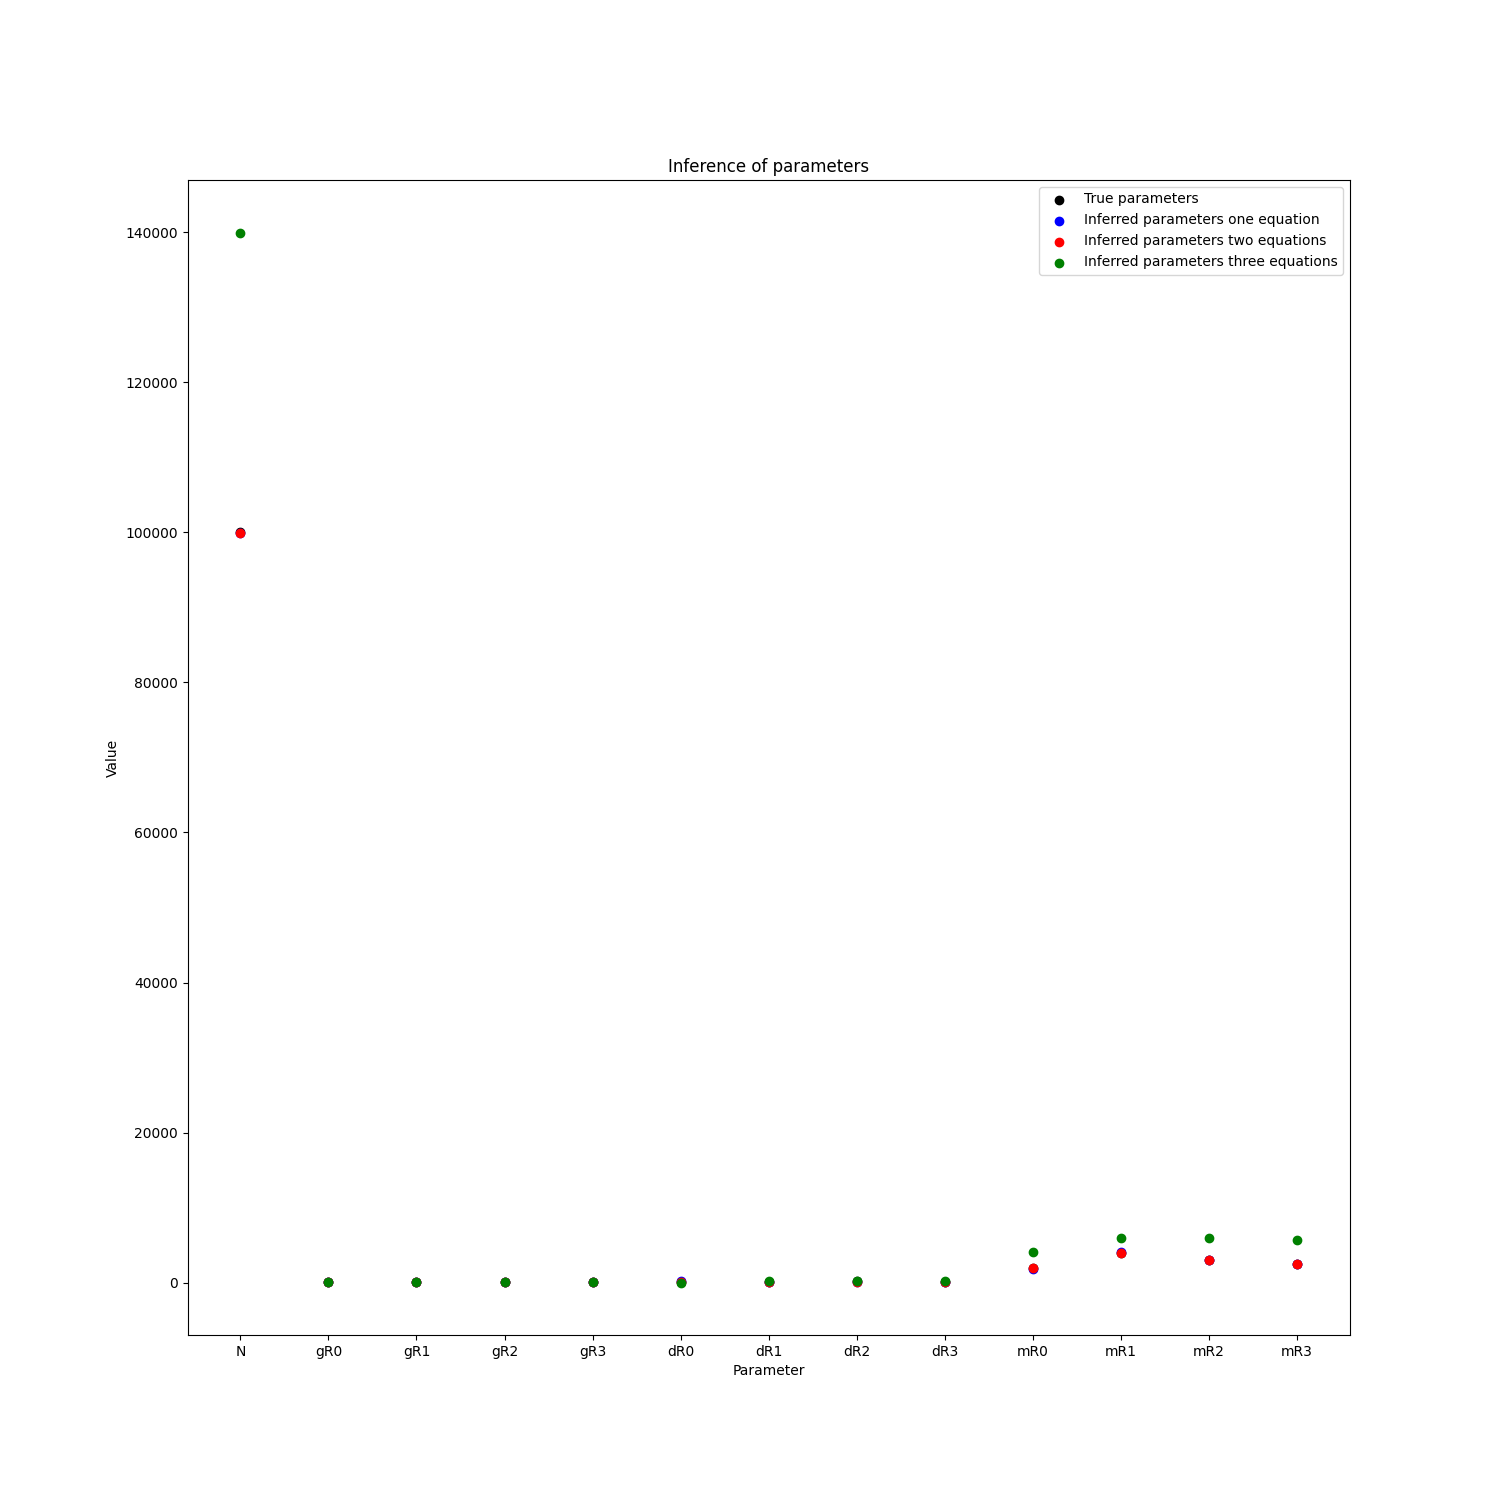

In [37]:
# Plot parameter inference with different number of equations

# plt.scatter(np.linspace(0, 1+n_types**2, 1+n_types**2), np.hstack((N, gR, dR, mR)), color='black', label='True parameters')
# plt.scatter(np.linspace(0, 1+n_types**2, 1+n_types**2), np.hstack((inference_one_equation)), color='blue', label='Inferred parameters one equation')
# plt.scatter(np.linspace(0, 1+n_types**2, 1+n_types**2), np.hstack((inference_two_equations)), color='red', label='Inferred parameters two equations')
# plt.scatter(np.linspace(0, 1+n_types**2, 1+n_types**2), np.hstack((inference_three_equations)), color='green', label='Inferred parameters three equations')


%matplotlib widget

# x_names = np.array(('N', 'gR1', 'gR2', 'gR3', 'dR1', 'dR2', 'dR3', 'mR1', 'mR2', 'mR3')) #for 3 types

x_names = []
x_names.append('N')
for i in range(n_types):
    x_names.append('gR'+str(i))
for i in range(n_types):
    x_names.append('dR'+str(i))
for i in range(n_types):
    x_names.append('mR'+str(i))
x_names


# Plot the results
fig, axs = plt.subplots(1, 1, figsize=(15, 15)) #create a figure with subplots for each species
# set axes, data, labels and limits (for average compositions)

axs.scatter(x_names, np.hstack((N, gR, dR, mR)), color='black', label='True parameters')
axs.scatter(x_names, inference_one_equation, color='blue', label='Inferred parameters one equation')
axs.scatter(x_names, inference_two_equations, color='red', label='Inferred parameters two equations')
axs.scatter(x_names, inference_three_equations, color='green', label='Inferred parameters three equations')
axs.set_title('Inference of parameters')
axs.set_xlabel('Parameter')
axs.set_ylabel('Value')
plt.legend()
# axs.set_xlim(0, 11)
# axs.set_ylim(0, 6000)
# include individual compositions of the replications


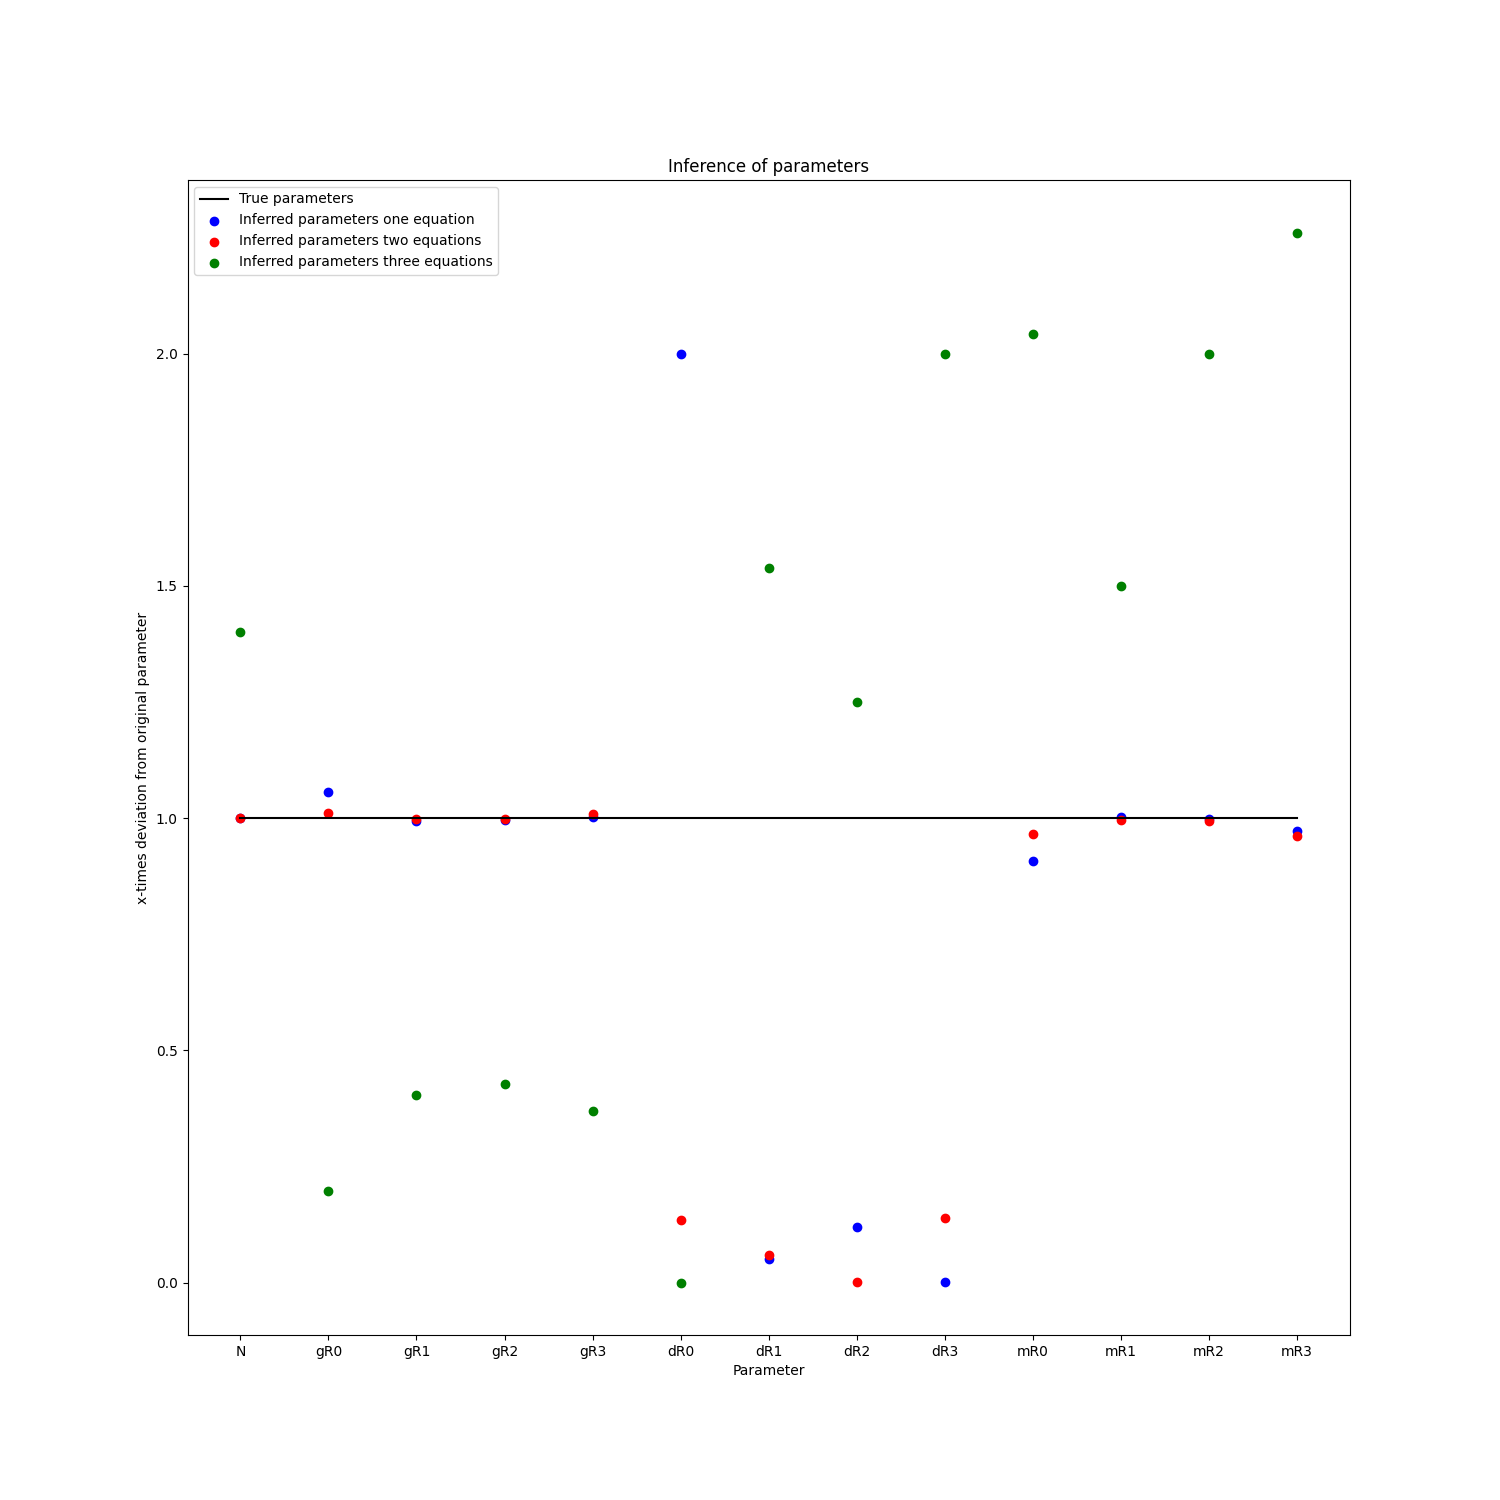

In [41]:
# Plot parameter inference with different number of equations
%matplotlib widget
# compute difference to original parameters
difference_inference_one_equation = inference_one_equation / np.hstack((N, gR, dR, mR))
difference_inference_two_equations =inference_two_equations / np.hstack((N, gR, dR, mR))
difference_inference_three_equations =inference_three_equations / np.hstack((N, gR, dR, mR))

# x_names = np.array(('N', 'gR1', 'gR2', 'gR3', 'dR1', 'dR2', 'dR3', 'mR1', 'mR2', 'mR3'))

# Plot the results
fig, axs = plt.subplots(1, 1, figsize=(15, 15)) #create a figure with subplots for each species
# set axes, data, labels and limits (for average compositions)

axs.plot(x_names, np.ones(n_types*3+1), color='black', label='True parameters')
axs.scatter(x_names, difference_inference_one_equation, color='blue', label='Inferred parameters one equation')
axs.scatter(x_names, difference_inference_two_equations, color='red', label='Inferred parameters two equations')
axs.scatter(x_names, difference_inference_three_equations, color='green', label='Inferred parameters three equations')
axs.set_title('Inference of parameters')
axs.set_xlabel('Parameter')
axs.set_ylabel('x-times deviation from original parameter')
axs.legend()
# axs.set_xlim(0, 11)
# axs.set_ylim(0, 6000)
# include individual compositions of the replications


In [46]:
# deviation of combined parameters


combined_difference_inference_one_equation = np.hstack(np.array(([difference_inference_one_equation[0]],[difference_inference_one_equation[1:n_types+1].sum()/3],[difference_inference_one_equation[n_types+1:2*n_types+1].sum()/3],[difference_inference_one_equation[2*n_types+1:3*n_types+1].sum()/3])))

combined_difference_inference_two_equations = np.hstack(np.array(([difference_inference_two_equations[0]],[difference_inference_two_equations[1:n_types+1].sum()/3],[difference_inference_two_equations[n_types+1:2*n_types+1].sum()/3],[difference_inference_two_equations[2*n_types+1:3*n_types+1].sum()/3])))

combined_difference_inference_three_equations = np.hstack(np.array(([difference_inference_three_equations[0]],[difference_inference_three_equations[1:n_types+1].sum()/3],[difference_inference_three_equations[n_types+1:2*n_types+1].sum()/3],[difference_inference_three_equations[2*n_types+1:3*n_types+1].sum()/3])))

print(difference_inference_one_equation.sum())
print(combined_difference_inference_one_equation)
print(difference_inference_two_equations.sum())
print(combined_difference_inference_two_equations)
print(difference_inference_three_equations.sum())
print(combined_difference_inference_three_equations)
n_types*3+1

# # Plot the results
# fig, axs = plt.subplots(1, 1, figsize=(15, 15)) #create a figure with subplots for each species
# # set axes, data, labels and limits (for average compositions)

# axs.plot(np.linspace(0, 1+n_types**2, 1+n_types**2), np.ones(10), color='black', label='True parameters')
# axs.scatter(np.linspace(0, 1+n_types**2, 1+n_types**2), difference_inference_one_equation, color='blue', label='Inferred parameters one equation')
# axs.scatter(np.linspace(0, 1+n_types**2, 1+n_types**2), difference_inference_two_equations, color='red', label='Inferred parameters two equations')
# axs.scatter(np.linspace(0, 1+n_types**2, 1+n_types**2), difference_inference_three_equations, color='green', label='Inferred parameters three equations')
# axs.set_title('Inference of parameters')
# axs.set_xlabel('Parameter')
# axs.set_ylabel('x-times deviation from original parameter')
# # axs.set_xlim(0, 11)
# # axs.set_ylim(0, 6000)
# # include individual compositions of the replications



11.097033051811318
[0.99966485 1.34944045 0.72342279 1.29292616]
9.262761306950386
[0.99912129 1.33816487 0.11066103 1.30572077]
15.387059410674475
[1.4        0.46558033 1.59615385 2.60061896]


13

In [ ]:
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit

def f(t, x, r):
    return r * x
t0 = 0
t1 = 5
t_data = np.linspace(t0, t1, 20)
y_data = 2 * np.exp(1.5 * t_data)
plt.scatter(t_data, y_data)



def solve(x, r):
    sol = solve_ivp(f, t_span=(t0, t1), y0=[2], method='LSODA', t_eval=t_data, args=[r])
    print(r)
    return sol.y[0]


popt, pcov = curve_fit(solve, xdata=t_data, ydata=y_data, p0=[1.1])
print(popt)


print(t_data)
print(y_data)	
y_data_estimate = 2 * np.exp(popt * t_data)

plt.scatter(t_data, y_data_estimate)




1.1
1.1
1.1
1.1000000163912773
2.2953817186813072
1.2195381718681308
1.2195381900406657
1.3548901517383796
1.3548901719278161
1.4965436717608036
1.4965436940610422
1.4991966034254476
1.4991966257652178
1.4991797271880383
1.499179749527557
1.4991797263162128
[1.49917973]
[0.         0.26315789 0.52631579 0.78947368 1.05263158 1.31578947
 1.57894737 1.84210526 2.10526316 2.36842105 2.63157895 2.89473684
 3.15789474 3.42105263 3.68421053 3.94736842 4.21052632 4.47368421
 4.73684211 5.        ]
[2.00000000e+00 2.96798723e+00 4.40447410e+00 6.53621144e+00
 9.69969604e+00 1.43942870e+01 2.13610300e+01 3.16996321e+01
 4.70420516e+01 6.98101043e+01 1.03597749e+02 1.53738398e+02
 2.28146801e+02 3.38568396e+02 5.02433338e+02 7.45607865e+02
 1.10647731e+03 1.64200526e+03 2.43672533e+03 3.61608483e+03]
